In [23]:
import pandas as pd
import hvplot.pandas
from scipy.stats import linregress
import matplotlib.pyplot as plt
import requests
from datetime import datetime
import numpy as np


In [3]:
# Reading csv
crimes_df = pd.read_csv('Crimes_-_2020_to_Present.csv')
crimes_df

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude
0,12014684,JD189901,3/17/2020 21:30,THEFT,$500 AND UNDER,STREET,False,False,16,45,2020,3/25/2020 15:45,41.952052,-87.754660
1,12571973,JE482457,12/19/2021 7:23,BATTERY,SIMPLE,SIDEWALK,True,True,9,15,2021,9/12/2022 16:45,41.816657,-87.695689
2,12012127,JD189186,3/18/2020 2:03,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,False,True,11,28,2020,3/25/2020 15:47,41.877110,-87.723990
3,12012330,JD189367,3/18/2020 8:50,ASSAULT,SIMPLE,RESIDENCE,False,False,25,35,2020,3/25/2020 15:47,41.923369,-87.731634
4,12014760,JD192130,3/18/2020 13:00,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER (SPECIFY),False,False,11,28,2020,3/25/2020 15:47,41.879264,-87.743971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10214,13034359,JG214126,2/5/2023 8:30,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,12,26,2023,4/9/2023 16:57,41.902936,-87.695584
10215,13027617,JG206353,3/31/2023 17:38,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,9,20,2023,4/7/2023 17:03,41.806899,-87.656110
10216,13028330,JG207003,3/31/2023 14:00,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,24,50,2023,4/7/2023 17:03,41.991274,-87.701854
10217,12344709,JE204664,4/17/2021 20:00,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,RESTAURANT,False,False,25,37,2021,4/24/2021 17:01,41.909427,-87.761526


In [4]:
# Checking for Nulls
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10219 entries, 0 to 10218
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10219 non-null  int64  
 1   Case Number           10219 non-null  object 
 2   Date                  10219 non-null  object 
 3   Primary Type          10219 non-null  object 
 4   Description           10219 non-null  object 
 5   Location Description  10171 non-null  object 
 6   Arrest                10219 non-null  bool   
 7   Domestic              10219 non-null  bool   
 8   District              10219 non-null  int64  
 9   Ward                  10219 non-null  int64  
 10  Year                  10219 non-null  int64  
 11  Updated On            10219 non-null  object 
 12  Latitude              10121 non-null  float64
 13  Longitude             10121 non-null  float64
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 978.1+ KB


In [5]:
# Dropping nulls
crimes_df_clean = crimes_df.dropna(how='any')
crimes_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 0 to 10218
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10080 non-null  int64  
 1   Case Number           10080 non-null  object 
 2   Date                  10080 non-null  object 
 3   Primary Type          10080 non-null  object 
 4   Description           10080 non-null  object 
 5   Location Description  10080 non-null  object 
 6   Arrest                10080 non-null  bool   
 7   Domestic              10080 non-null  bool   
 8   District              10080 non-null  int64  
 9   Ward                  10080 non-null  int64  
 10  Year                  10080 non-null  int64  
 11  Updated On            10080 non-null  object 
 12  Latitude              10080 non-null  float64
 13  Longitude             10080 non-null  float64
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 1.0+ MB


In [6]:
# Displaying dataframe
crimes_df_clean.head()

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude
0,12014684,JD189901,3/17/2020 21:30,THEFT,$500 AND UNDER,STREET,False,False,16,45,2020,3/25/2020 15:45,41.952052,-87.754660
1,12571973,JE482457,12/19/2021 7:23,BATTERY,SIMPLE,SIDEWALK,True,True,9,15,2021,9/12/2022 16:45,41.816657,-87.695689
2,12012127,JD189186,3/18/2020 2:03,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,False,True,11,28,2020,3/25/2020 15:47,41.877110,-87.723990
3,12012330,JD189367,3/18/2020 8:50,ASSAULT,SIMPLE,RESIDENCE,False,False,25,35,2020,3/25/2020 15:47,41.923369,-87.731634
4,12014760,JD192130,3/18/2020 13:00,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER (SPECIFY),False,False,11,28,2020,3/25/2020 15:47,41.879264,-87.743971


In [7]:
# Pulling only 2020 year data
crimes_2020 = crimes_df_clean.loc[crimes_df_clean['Year'] == 2020]
crimes_2020.head()

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude
0,12014684,JD189901,3/17/2020 21:30,THEFT,$500 AND UNDER,STREET,False,False,16,45,2020,3/25/2020 15:45,41.952052,-87.754660
2,12012127,JD189186,3/18/2020 2:03,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,False,True,11,28,2020,3/25/2020 15:47,41.877110,-87.723990
3,12012330,JD189367,3/18/2020 8:50,ASSAULT,SIMPLE,RESIDENCE,False,False,25,35,2020,3/25/2020 15:47,41.923369,-87.731634
4,12014760,JD192130,3/18/2020 13:00,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER (SPECIFY),False,False,11,28,2020,3/25/2020 15:47,41.879264,-87.743971
5,12012667,JD189808,3/18/2020 17:35,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,15,28,2020,3/25/2020 15:47,41.876128,-87.745112


In [8]:
# Sorting District column in ascending order
sorted_2020 = crimes_2020.sort_values('District', ascending=True)
sorted_2020

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude
5150,12132306,JD328580,8/10/2020 3:30,BURGLARY,FORCIBLE ENTRY,CONVENIENCE STORE,False,False,1,42,2020,8/17/2020 15:50,41.885368,-87.635403
9814,12135462,JD332126,8/10/2020 4:02,BURGLARY,FORCIBLE ENTRY,CONVENIENCE STORE,False,False,1,42,2020,8/19/2020 15:49,41.878706,-87.636937
8701,12016285,JD193762,3/24/2020 4:30,CRIMINAL TRESPASS,TO LAND,CHA HALLWAY / STAIRWELL / ELEVATOR,False,False,1,3,2020,3/31/2020 15:48,41.853931,-87.623841
1540,12015818,JD185816,3/14/2020 15:00,THEFT,POCKET-PICKING,GAS STATION,False,False,1,3,2020,3/26/2020 15:45,41.866844,-87.625817
8900,12244310,JD458290,12/13/2020 19:05,BATTERY,SIMPLE,SIDEWALK,False,True,1,3,2020,12/20/2020 15:50,41.857494,-87.627186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8184,12017479,JD194995,3/25/2020 19:36,ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,25,36,2020,4/1/2020 15:52,41.919098,-87.760907
6497,12016658,JD194123,3/24/2020 15:34,OFFENSE INVOLVING CHILDREN,ENDANGERING LIFE / HEALTH OF CHILD,APARTMENT,False,True,25,31,2020,3/31/2020 15:48,41.926826,-87.759849
1284,12130752,JD326566,8/9/2020 12:00,THEFT,$500 AND UNDER,CHURCH / SYNAGOGUE / PLACE OF WORSHIP,False,False,25,35,2020,8/16/2020 15:50,41.914035,-87.736237
3640,12013857,JD191059,3/20/2020 9:45,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,25,30,2020,3/27/2020 15:48,41.928591,-87.762248


In [9]:
# Getting rid of districts we don't have populations for
sorted_clean_2020 = sorted_2020[~sorted_2020['District'].isin([19,20,22,24,25])]

In [10]:
# Pulling month from full date and adding it as a column
sorted_clean_2020 = sorted_clean_2020.copy()
sorted_clean_2020['month'] = pd.DatetimeIndex(sorted_clean_2020['Date']).month
sorted_clean_2020

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude,month
5150,12132306,JD328580,8/10/2020 3:30,BURGLARY,FORCIBLE ENTRY,CONVENIENCE STORE,False,False,1,42,2020,8/17/2020 15:50,41.885368,-87.635403,8
9814,12135462,JD332126,8/10/2020 4:02,BURGLARY,FORCIBLE ENTRY,CONVENIENCE STORE,False,False,1,42,2020,8/19/2020 15:49,41.878706,-87.636937,8
8701,12016285,JD193762,3/24/2020 4:30,CRIMINAL TRESPASS,TO LAND,CHA HALLWAY / STAIRWELL / ELEVATOR,False,False,1,3,2020,3/31/2020 15:48,41.853931,-87.623841,3
1540,12015818,JD185816,3/14/2020 15:00,THEFT,POCKET-PICKING,GAS STATION,False,False,1,3,2020,3/26/2020 15:45,41.866844,-87.625817,3
8900,12244310,JD458290,12/13/2020 19:05,BATTERY,SIMPLE,SIDEWALK,False,True,1,3,2020,12/20/2020 15:50,41.857494,-87.627186,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915,12018023,JD195535,3/23/2020 7:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,18,2,2020,3/30/2020 15:51,41.911840,-87.638616,3
5722,12243958,JD457804,12/12/2020 13:00,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,18,42,2020,12/19/2020 15:48,41.899410,-87.624131,12
8414,12135516,JD332036,8/10/2020 2:42,BURGLARY,FORCIBLE ENTRY,CONVENIENCE STORE,False,False,18,42,2020,8/19/2020 15:49,41.893647,-87.631177,8
5934,12015679,JD193048,3/23/2020 2:27,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,HOTEL / MOTEL,True,False,18,2,2020,3/30/2020 15:51,41.900052,-87.621476,3


In [11]:
# Reading district population csv
district_population = pd.read_csv('District Populations.csv')
district_population

,District,District Population
0,1,705263
1,2,692805
2,3,708422
3,4,683260
4,5,737812
5,6,723356
6,7,720942
7,8,708921
8,9,724967
9,10,705705


In [12]:
# Calculating Crime Rates
district_number_list = list(sorted_clean_2020['District'].unique())
crime_rate = []
for district_number in district_number_list:
    # Take the number of crimes of current district and divide by district's population
    x = (len(sorted_clean_2020.loc[sorted_clean_2020['District'] == district_number]))/(district_population.loc[district_population['District'] == district_number]['District Population'].tolist()[0])*100000
    crime_rate.append((district_number, x))

crime_rate

[(1, 45.231353410004495),
 (2, 50.66360664256176),
 (3, 55.051932322824534),
 (4, 69.95872727804935),
 (5, 55.56971152542924),
 (6, 75.61975016451098),
 (7, 60.3377248100402),
 (8, 65.45158064156655),
 (9, 48.69187149208171),
 (10, 51.721328317073),
 (11, 79.99966550662505),
 (12, 54.05037262877538),
 (14, 31.696490591537444),
 (15, 52.94884327142392),
 (16, 37.162733731181845),
 (17, 34.330750141688334),
 (18, 58.236296628289715)]

In [13]:
final_df = sorted_clean_2020.copy()
final_df['Crime Rate'] = np.nan
final_df

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude,month,Crime Rate
5150,12132306,JD328580,8/10/2020 3:30,BURGLARY,FORCIBLE ENTRY,CONVENIENCE STORE,False,False,1,42,2020,8/17/2020 15:50,41.885368,-87.635403,8,NaN
9814,12135462,JD332126,8/10/2020 4:02,BURGLARY,FORCIBLE ENTRY,CONVENIENCE STORE,False,False,1,42,2020,8/19/2020 15:49,41.878706,-87.636937,8,NaN
8701,12016285,JD193762,3/24/2020 4:30,CRIMINAL TRESPASS,TO LAND,CHA HALLWAY / STAIRWELL / ELEVATOR,False,False,1,3,2020,3/31/2020 15:48,41.853931,-87.623841,3,NaN
1540,12015818,JD185816,3/14/2020 15:00,THEFT,POCKET-PICKING,GAS STATION,False,False,1,3,2020,3/26/2020 15:45,41.866844,-87.625817,3,NaN
8900,12244310,JD458290,12/13/2020 19:05,BATTERY,SIMPLE,SIDEWALK,False,True,1,3,2020,12/20/2020 15:50,41.857494,-87.627186,12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915,12018023,JD195535,3/23/2020 7:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,18,2,2020,3/30/2020 15:51,41.911840,-87.638616,3,NaN
5722,12243958,JD457804,12/12/2020 13:00,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,18,42,2020,12/19/2020 15:48,41.899410,-87.624131,12,NaN
8414,12135516,JD332036,8/10/2020 2:42,BURGLARY,FORCIBLE ENTRY,CONVENIENCE STORE,False,False,18,42,2020,8/19/2020 15:49,41.893647,-87.631177,8,NaN
5934,12015679,JD193048,3/23/2020 2:27,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,HOTEL / MOTEL,True,False,18,2,2020,3/30/2020 15:51,41.900052,-87.621476,3,NaN


In [14]:
for district_number, crime_rate_number in crime_rate:
    for x in final_df.loc[final_df['District'] == district_number].index:
        final_df.at[x, 'Crime Rate'] = crime_rate_number
final_df

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude,month,Crime Rate
5150,12132306,JD328580,8/10/2020 3:30,BURGLARY,FORCIBLE ENTRY,CONVENIENCE STORE,False,False,1,42,2020,8/17/2020 15:50,41.885368,-87.635403,8,45.231353
9814,12135462,JD332126,8/10/2020 4:02,BURGLARY,FORCIBLE ENTRY,CONVENIENCE STORE,False,False,1,42,2020,8/19/2020 15:49,41.878706,-87.636937,8,45.231353
8701,12016285,JD193762,3/24/2020 4:30,CRIMINAL TRESPASS,TO LAND,CHA HALLWAY / STAIRWELL / ELEVATOR,False,False,1,3,2020,3/31/2020 15:48,41.853931,-87.623841,3,45.231353
1540,12015818,JD185816,3/14/2020 15:00,THEFT,POCKET-PICKING,GAS STATION,False,False,1,3,2020,3/26/2020 15:45,41.866844,-87.625817,3,45.231353
8900,12244310,JD458290,12/13/2020 19:05,BATTERY,SIMPLE,SIDEWALK,False,True,1,3,2020,12/20/2020 15:50,41.857494,-87.627186,12,45.231353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915,12018023,JD195535,3/23/2020 7:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,18,2,2020,3/30/2020 15:51,41.911840,-87.638616,3,58.236297
5722,12243958,JD457804,12/12/2020 13:00,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,18,42,2020,12/19/2020 15:48,41.899410,-87.624131,12,58.236297
8414,12135516,JD332036,8/10/2020 2:42,BURGLARY,FORCIBLE ENTRY,CONVENIENCE STORE,False,False,18,42,2020,8/19/2020 15:49,41.893647,-87.631177,8,58.236297
5934,12015679,JD193048,3/23/2020 2:27,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,HOTEL / MOTEL,True,False,18,2,2020,3/30/2020 15:51,41.900052,-87.621476,3,58.236297


In [21]:
crime_percent= []
for number in district_number_list:
    percent= len(final_df.loc[final_df["District"] == number]["District"])/(len(final_df))
    crime_percent.append(percent)

crime_percent

[0.0486651411136537,
 0.05354691075514874,
 0.059496567505720827,
 0.07292143401983218,
 0.06254767353165523,
 0.08344774980930587,
 0.06636155606407322,
 0.07078565980167811,
 0.05385202135774218,
 0.05568268497330282,
 0.08756674294431732,
 0.05690312738367658,
 0.03585049580472922,
 0.0555301296720061,
 0.03920671243325705,
 0.03539282990083906,
 0.06224256292906179]

Text(0, 0.5, 'crime_rate_percent')

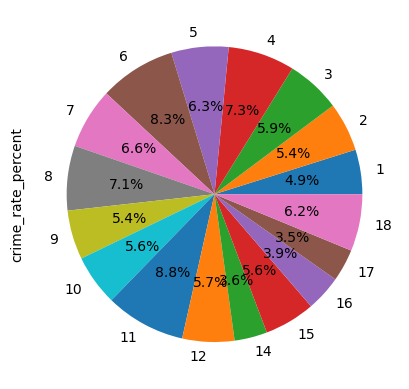

In [24]:
plt.pie(crime_percent, labels=district_population['District'], autopct='%1.1f%%')
plt.ylabel('crime_rate_percent')